## Notebook dedicado a demonstrar os melhores resultados obtidos pela equipe

### Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from linear_models import *
from utils import *

### Pre-processamento dos dados 

In [2]:
new_train_df = pd.read_csv('./dados/train_reduced.csv')
new_test_df = pd.read_csv('./dados/test_reduced.csv')

In [3]:
new_train_df = pd.read_csv('./dados/train_reduced.csv')
new_test_df = pd.read_csv('./dados/test_reduced.csv')

X_train = new_train_df[['intensidade', 'simetria']]
X_train = X_train.to_numpy()
X_train = np.c_[np.ones(X_train.shape[0]), X_train]

X_test = new_test_df[['intensidade', 'simetria']]
X_test = X_test.to_numpy()
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

y_train = new_train_df['label']
y_train = y_train.to_numpy()

y_test = new_test_df['label']
y_test = y_test.to_numpy()

### Resultados dos classificadores Um contra todos

In [6]:
best_w_df = pd.DataFrame(
    {
        "reg_linear": [],
        "pla": [],
        "reg_logistica": []
    }
)
best_w_df.head()

,reg_linear,pla,reg_logistica


#### Regressão Linear

Resultados - Linear Regression
---------------------------------
RELATORIO CLASSIFICACAO MULTICLASS
_______________________________________________________
Acurracy: 0.9614
Error de Classificacao: 0.0386
_______________________________________________________
_______________________________________________________
Precision para digito 0: 1.0000
Recall para digito 0: 0.9495
F1 Score para digito 0: 0.9741
_______________________________________________________
_______________________________________________________
Precision para digito 1: 1.0000
Recall para digito 1: 1.0000
F1 Score para digito 1: 1.0000
_______________________________________________________
_______________________________________________________
Precision para digito 4: 0.9273
Recall para digito 4: 0.9745
F1 Score para digito 4: 0.9503
_______________________________________________________
_______________________________________________________
Precision para digito 5: 0.9336
Recall para digito 5: 0.9175
F1 Score pa

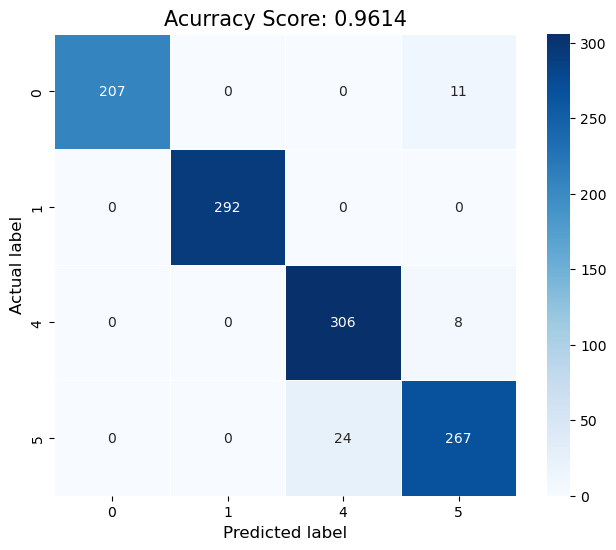

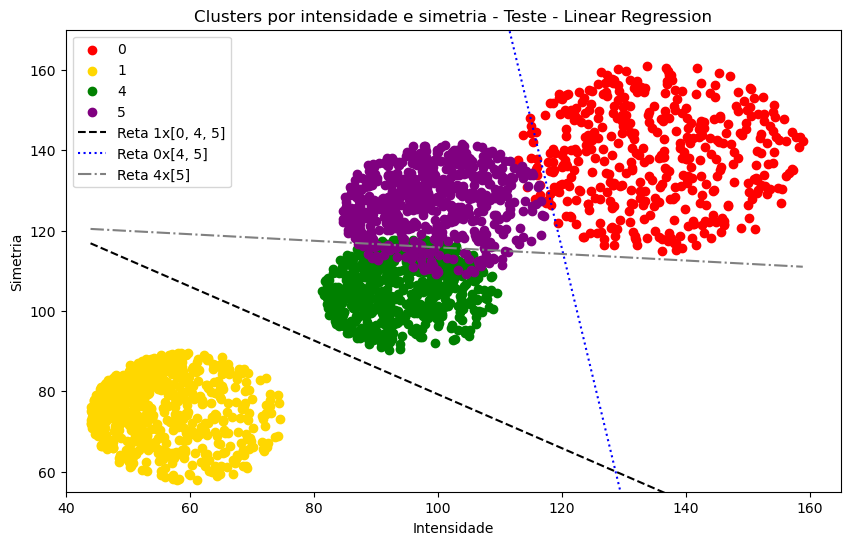

In [4]:
best_digits_linear_reg = [1, 0, 4, 5]

lr = LinearRegression()

modelo_linreg = Um_contra_todos(lr, best_digits_linear_reg)
modelo_linreg.execute(X_train, y_train)
all_w_linreg = modelo_linreg.get_all_w()
y_pred_linreg = modelo_linreg.predict_digit(X_test)


print('Resultados - ' + str(lr))
metrics = Metrics_multiclass(best_digits_linear_reg)
metrics.print_metrics_multiclass(y_test, y_pred_linreg)

title_linreg = 'Clusters por intensidade e simetria - Teste - ' + str(lr)
plot_classification_digits(new_train_df, best_digits_linear_reg, title_linreg, W=all_w_linreg[:4])

#### Perceptron Pocket

100%|██████████| 30000/30000 [06:28<00:00, 77.20it/s]


Resultados - Pocket PLA
---------------------------------
RELATORIO CLASSIFICACAO MULTICLASS
_______________________________________________________
Acurracy: 0.9668
Error de Classificacao: 0.0332
_______________________________________________________
_______________________________________________________
Precision para digito 0: 0.9907
Recall para digito 0: 0.9771
F1 Score para digito 0: 0.9838
_______________________________________________________
_______________________________________________________
Precision para digito 1: 1.0000
Recall para digito 1: 0.9966
F1 Score para digito 1: 0.9983
_______________________________________________________
_______________________________________________________
Precision para digito 4: 0.9277
Recall para digito 4: 0.9809
F1 Score para digito 4: 0.9536
_______________________________________________________
_______________________________________________________
Precision para digito 5: 0.9603
Recall para digito 5: 0.9141
F1 Score para digi

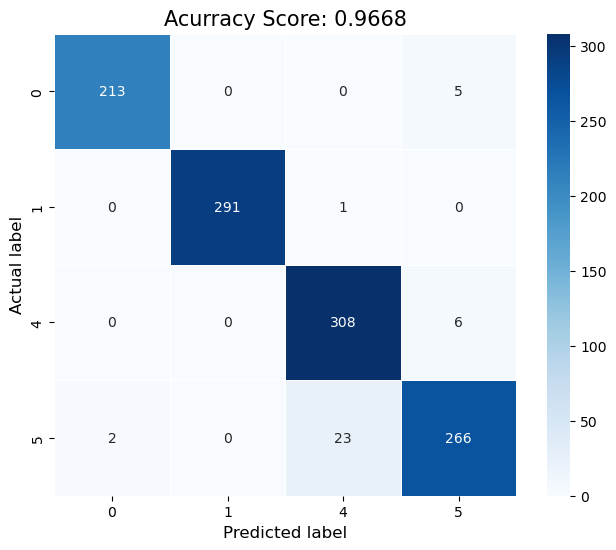

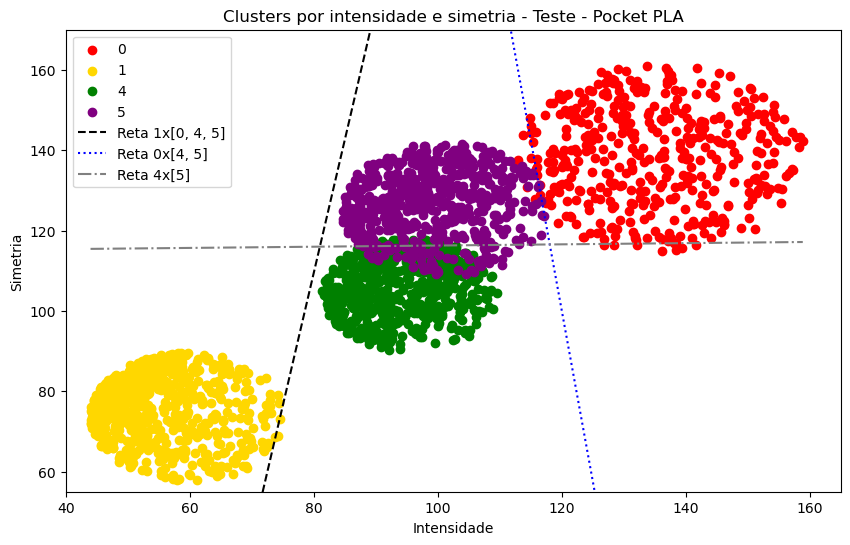

In [5]:
best_digits_pla =  [1, 0, 4, 5]

Nmin = np.ceil(X_train.shape[0] * 0.5).astype(int)
Nmax = np.ceil(X_train.shape[0] * 1.0).astype(int) - 1
best_iter = 30000
lr = PocketPLA(best_iter, Nmin=Nmin, Nmax=Nmax)

modelo_pla = Um_contra_todos(lr, best_digits_pla)
modelo_pla.execute(X_train, y_train)
all_w_pla = modelo_pla.get_all_w()
y_pred_pla = modelo_pla.predict_digit(X_test)


print('Resultados - ' + str(lr))
metrics = Metrics_multiclass(best_digits_pla)
metrics.print_metrics_multiclass(y_test, y_pred_pla)

title_pla = 'Clusters por intensidade e simetria - Teste - ' + str(lr)
plot_classification_digits(new_train_df, best_digits_pla, title_pla, W=all_w_pla[:4])

#### Regressão Logística

100%|██████████| 2500000/2500000 [03:40<00:00, 11342.80it/s]


Resultados - Logistic Regression
---------------------------------
RELATORIO CLASSIFICACAO MULTICLASS
_______________________________________________________
Acurracy: 0.9390
Error de Classificacao: 0.0610
_______________________________________________________
_______________________________________________________
Precision para digito 0: 0.9518
Recall para digito 0: 0.9954
F1 Score para digito 0: 0.9731
_______________________________________________________
_______________________________________________________
Precision para digito 1: 1.0000
Recall para digito 1: 1.0000
F1 Score para digito 1: 1.0000
_______________________________________________________
_______________________________________________________
Precision para digito 4: 0.9743
Recall para digito 4: 0.8439
F1 Score para digito 4: 0.9044
_______________________________________________________
_______________________________________________________
Precision para digito 5: 0.8452
Recall para digito 5: 0.9381
F1 Score 

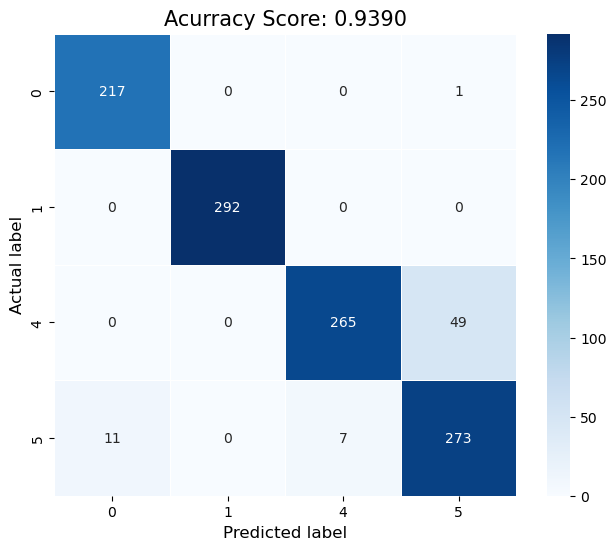

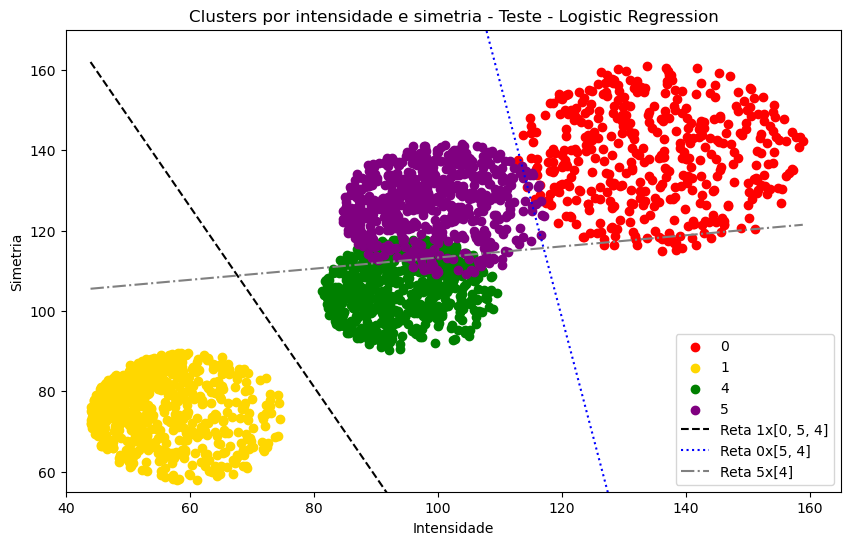

In [5]:
best_digits_logreg = [1, 0, 5, 4]

best_iter = 2500000
lr = LogisticRegression(tmax=best_iter, batch_size=128)

modelo_logreg = Um_contra_todos(lr, best_digits_logreg)
modelo_logreg.execute(X_train, y_train)
all_w_logreg = modelo_logreg.get_all_w()
y_pred_logreg = modelo_logreg.predict_digit(X_test)

print('Resultados - ' + str(lr))
metrics = Metrics_multiclass(best_digits_logreg)
metrics.print_metrics_multiclass(y_test, y_pred_logreg)

title_logreg = 'Clusters por intensidade e simetria - Teste - ' + str(lr)
plot_classification_digits(new_train_df, best_digits_logreg, title_logreg, W=all_w_logreg[:4])

### Resultado final do projeto

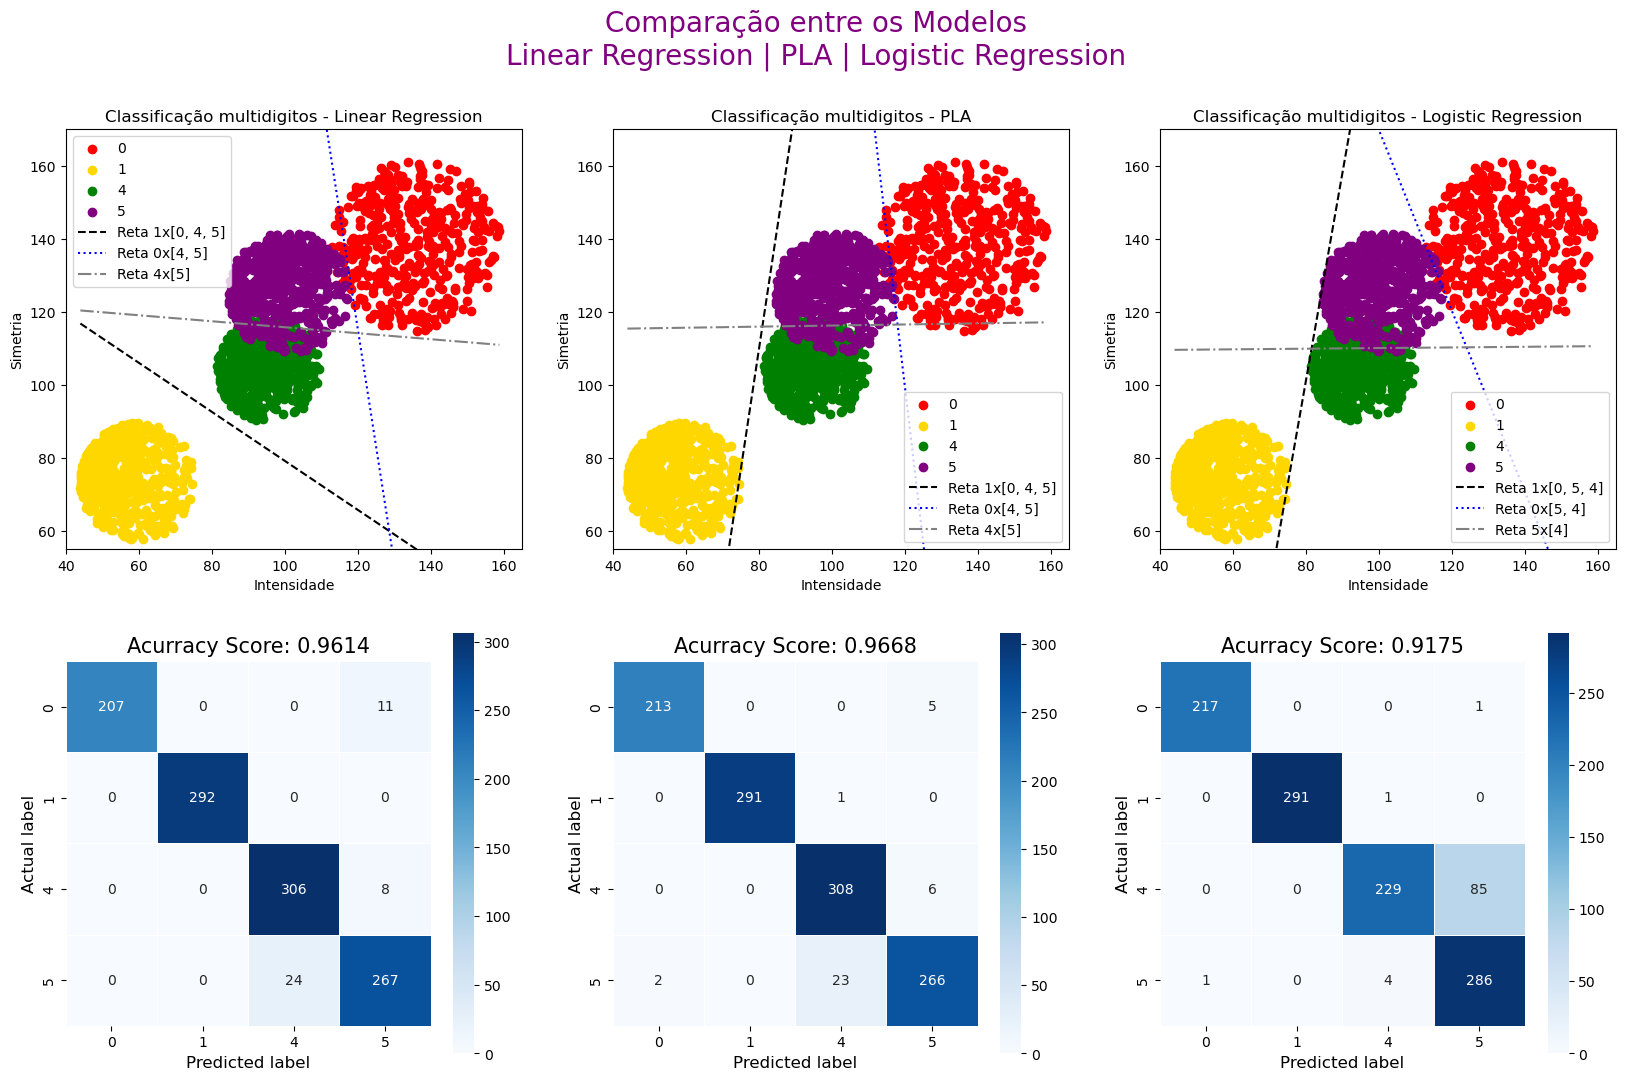

In [7]:
fig, axs = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Comparação entre os Modelos\nLinear Regression | PLA | Logistic Regression', fontsize=20, color = "purple")

# classification digits
plot_classification_digits(new_train_df, best_digits_linear_reg, title_linreg, ax=axs[0, 0], W=all_w_linreg[:4])
axs[0, 0].set_title('Classificação multidigitos - Linear Regression')
plot_classification_digits(new_train_df, best_digits_pla, title_pla, ax=axs[0, 1], W=all_w_pla[:4])
axs[0, 1].set_title('Classificação multidigitos - PLA')
plot_classification_digits(new_train_df, best_digits_logreg, title_logreg, ax=axs[0, 2], W=all_w_logreg[:4])
axs[0, 2].set_title('Classificação multidigitos - Logistic Regression')

# confusion matrix
confusion_matrix_plot(y_test, y_pred_linreg, ax=axs[1, 0])
confusion_matrix_plot(y_test, y_pred_pla, ax=axs[1, 1])
confusion_matrix_plot(y_test, y_pred_logreg, ax=axs[1, 2])

plt.show()